In [1]:
import pandas as pd

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
# Load dataset
data = load_iris()
X, y = data.data, data.target
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=42)
# Initialize and train the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred) 
print(f'Accuracy:{accuracy}')

Accuracy:1.0


In [4]:
import numpy as np

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [6]:
# below are the probabilities obtained from a hypothetical model that
# doesn't always predict the mode
y_proba_2 = np.array(
np.random.uniform(0, .7, n_0).tolist() +
np.random.uniform(.3, 1, n_1).tolist()
)
y_pred_2 = y_proba_2 > .5
print(f'accuracy score: {accuracy_score(y, y_pred_2)}')
cf_mat = confusion_matrix(y, y_pred_2)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

NameError: name 'n_0' is not defined

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Panaudodami mašininį mokymąsi (linearRegression, Logistic, DecisionTree ...) 
# pateikite orų prognozę 24rioms valandoms į priekį. Pritaikykite daugiau nei vieną ML algoritmą.
# Pateikite Modelių tikslumo įverčius. Pateikite Modelio prognozę, LHMT tarnybos prognozę, o praėjus 24 valandoms
# - stebėjimų rezultatus, pagal kuriuos apskaičiuosite modelių tikslumus.
# meteorologinės stoties duomenys: https://www.meteo.lt/lt/miestas/vilnius
# https://www.meteo.lt/lt/miestas/kaunas
# https://www.meteo.lt/lt/miestas/klaipeda


In [41]:
data = pd.read_csv(r"C:\Users\Batia\Downloads\interval_data(1).csv")

In [42]:
data.head()

,obs_time_utc,air_temperature,feels_like_temperature,wind_speed,wind_gust,wind_direction,cloud_cover,sea_level_pressure,relative_humidity,precipitation,condition_code
0,2025-01-05 00:00:00,-6.1,-11.8,4.0,7.7,210,100,1013.3,82,0.0,cloudy
1,2025-01-05 01:00:00,-6.6,-11.7,3.2,6.1,211,88,1013.2,82,0.0,cloudy
2,2025-01-05 02:00:00,-6.6,-12.2,3.8,6.1,201,100,1012.8,86,0.0,cloudy
3,2025-01-05 03:00:00,-6.0,-12.6,5.2,10.2,213,88,1012.1,87,0.0,cloudy
4,2025-01-05 04:00:00,-5.7,-12.8,6.1,10.8,213,88,1011.7,86,0.0,cloudy


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [43]:
data['obs_time_utc'] = pd.to_datetime(data['obs_time_utc'])
data = data.sort_values(by='obs_time_utc')


data['air_temp_lag_1'] = data['air_temperature'].shift(1)
data['air_temp_lag_2'] = data['air_temperature'].shift(2)


data = data.dropna(subset=['air_temp_lag_1', 'air_temp_lag_2'])

In [44]:
features = ['air_temp_lag_1', 'air_temp_lag_2', 'wind_speed', 'cloud_cover', 
            'sea_level_pressure', 'relative_humidity', 'precipitation']
target = 'air_temperature'

X = data[features]
y = data[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
X_imputed = X.copy()
X_imputed['cloud_cover'] = X_imputed['cloud_cover'].fillna(X_imputed['cloud_cover'].median())


X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [46]:
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)


linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


linear_preds = linear_model.predict(X_test)
rf_preds = rf_model.predict(X_test)


linear_rmse = np.sqrt(mean_squared_error(y_test, linear_preds))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

linear_rmse, rf_rmse

(0.25211915622058606, 0.3150059964155889)

In [47]:

forecast_data = X_test.iloc[-1:].copy()  # Nachalo s poslednej izvestnoj temperatury
forecast_data['air_temperature'] = y_test.iloc[-1]  # Dodajem izvestnuju temperaturu

# Predskazanie temperatury na sledujushij chas
forecast_results = []

for hour in range(24):
    # Predskazyvaet temperaturu na sledujushij chas
    linear_forecast = linear_model.predict(forecast_data[features])[0]
    rf_forecast = rf_model.predict(forecast_data[features])[0]
    
    # soxraniajet prognoz na etot chas
    forecast_results.append({
        "hour": hour + 1,
        "linear_forecast": linear_forecast,
        "rf_forecast": rf_forecast
    })
    
    # Obnovliajet laggerovannyje featury na sledujuweje predskazanie diamichno
    # soxraniajet prognoz na etot chas
    forecast_data['air_temp_lag_2'] = forecast_data['air_temp_lag_1']
    forecast_data['air_temp_lag_1'] = linear_forecast  # Predskazanie linejnoj modeli
    
    # soxraniajet prognoz na etot chas
    forecast_data.reset_index(drop=True, inplace=True)


forecast_df = pd.DataFrame(forecast_results)



In [48]:
forecast_df

,hour,linear_forecast,rf_forecast
0,1,-4.350810,-4.543
1,2,-4.092469,-4.182
2,3,-3.817092,-3.196
3,4,-3.524870,-3.208
4,5,-3.214548,-3.023
5,6,-2.885046,-3.006
6,7,-2.535169,-2.879
7,8,-2.163661,-2.462
8,9,-1.769182,-2.317
9,10,-1.350313,-2.322


In [49]:
import matplotlib.pyplot as plt

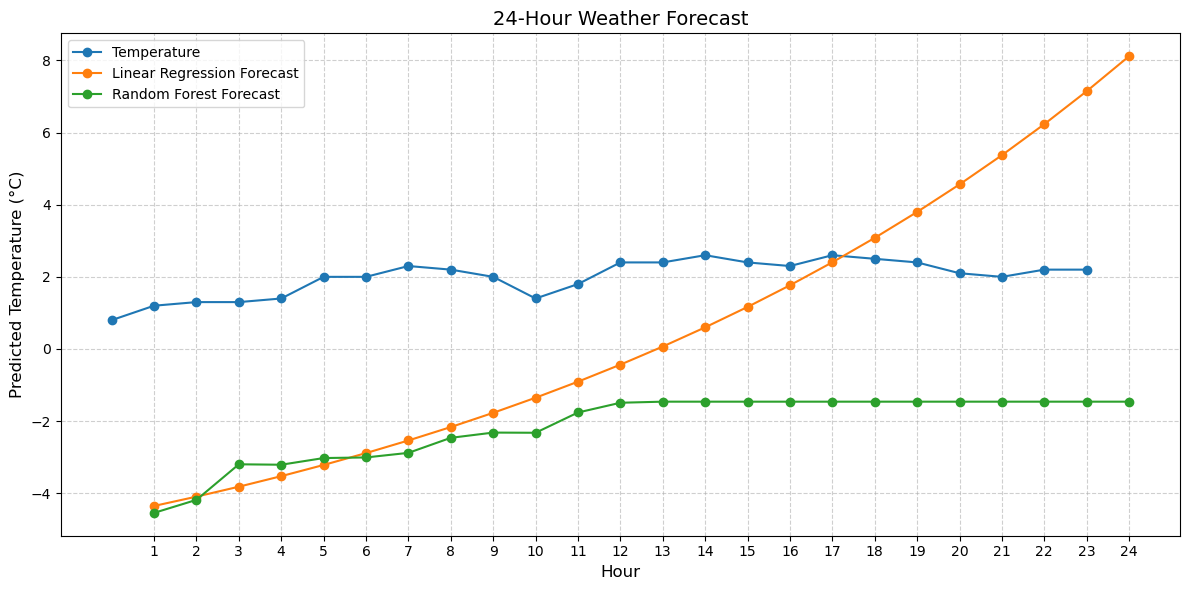

In [53]:
forecast_df = pd.DataFrame(forecast_results)


plt.figure(figsize=(12, 6))

file_path = r"C:\Users\Batia\Downloads\interval_data(2).csv"
meteo_data = pd.read_csv(file_path)

# Filter the data for the specified range (rows 22 to 45)
temperature_data = meteo_data.iloc[22:46]  # Rows 22 to 45 (inclusive)

# Plot the temperature data
# plt.figure(figsize=(12, 6))
hours = range(0, 24)
plt.plot(hours, temperature_data['air_temperature'], label='Temperature', marker='o')
# plt.plot(temperature_data.index, temperature_data['air_temperature'], label='Temperature', marker='o')


plt.plot(forecast_df['hour'], forecast_df['linear_forecast'], label="Linear Regression Forecast", marker='o')


plt.plot(forecast_df['hour'], forecast_df['rf_forecast'], label="Random Forest Forecast", marker='o')


plt.title("24-Hour Weather Forecast", fontsize=14)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Predicted Temperature (°C)", fontsize=12)
plt.xticks(range(1, 25))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
data = pd.read_csv(r"C:\Users\Batia\Downloads\interval_data(1).csv")